In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import pyplot

In [4]:
# Read one day of data from txt (September 1st), store it as pickle and format it
# One day - September 1st
# UPDATE WITH LOCAL PATH
df3=pd.read_csv("drive/My Drive/Data/Residential Smart Meter/September 2020/m20200901.txt", delimiter = "\t", names=['timestamp', 'power'])

In [5]:
lst = os.listdir("drive/My Drive/Data/Residential Smart Meter/September 2020/") # your directory path
number_files = len(lst)

df = pd.DataFrame()

for i in range(number_files):
  if i<9:
    temp_string="drive/My Drive/Data/Residential Smart Meter/September 2020/m202009"+str(0)+str(i+1)+".txt"
  else:
   temp_string="drive/My Drive/Data/Residential Smart Meter/September 2020/m202009"+str(i+1)+".txt"

  temp_string_day=temp_string[60:64]+"-"+temp_string[64:66]+"-"+temp_string[66:68]
  df_temp=pd.read_csv(temp_string, delimiter = "\t", names=['timestamp', temp_string_day])
  df[temp_string_day]=df_temp[temp_string_day]

In [6]:
# Timestamps processing and index setting

a=df_temp["timestamp"]
for i in range(a.size):
    a[i]=a[i][0:19]

a=pd.to_datetime(a)

df=df.set_index(a.dt.time)

<ipython-input-6-4d1f2f787065>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=a[i][0:19]


In [9]:
# Write monthly dataframe to pickle
with open('drive/MyDrive/Data/monthly_residential_dataframe.pickle', 'wb') as handle:
    pickle.dump(df, handle)

# Read monthly dataframe from pickle
with open('drive/MyDrive/Data/monthly_residential_dataframe.pickle', 'rb') as handle:
        df = pickle.load(handle)

In [10]:
v=np.arange(0,86400,3600)

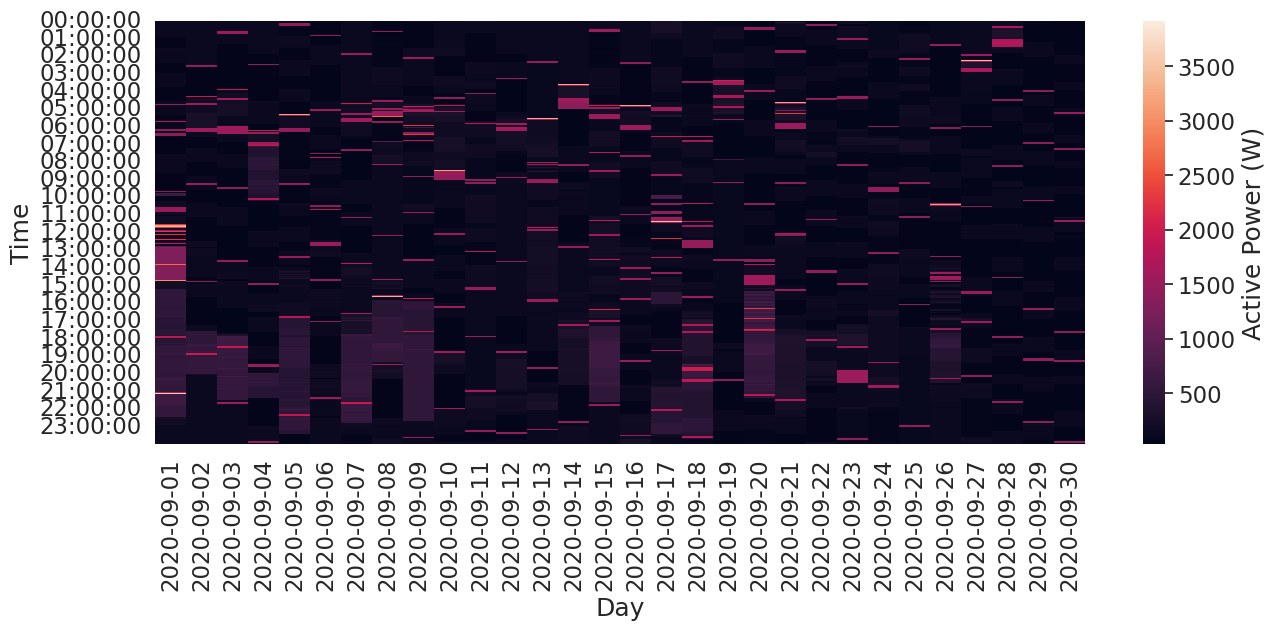

In [12]:
# Heatmap plot

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(15, 7.3))
s=sns.heatmap(df, cbar_kws={'label': 'Active Power (W)'})
s.set(xlabel='Day', ylabel='Time',yticklabels=df.index[v])
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('drive/MyDrive/Figures/residential_heatmap.png', format='png')
plt.show()

In [24]:
# ------------------------
# DEFINE HELPER FUNCTION
# ------------------------

def hampel_filter(series, window_size, n_sigmas=3):
  ''' Implementation based on https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d '''
  k = 1.4826  # scale factor for Gaussian distribution

  # make a new series in which we overwrite the outliers
  new_series = series.copy()

  # calculate the median of the data in the neighborhood
  rolling_median = series.rolling(window=2 * window_size, center=True).median()

  # calculate the median absolute difference to estimate the spread of the distribution
  rolling_mad = k * series.rolling(window=2 * window_size, center=True).apply(
      lambda x: np.median(np.abs(x - np.median(x)))
  )

  # calculate the deviation of each point from the median
  diff = np.abs(series - rolling_median)

  # select values that deviate more than n_sigma from the mad and replace them with the median
  mask = diff > (n_sigmas * rolling_mad)
  new_series[mask] = rolling_median[mask]

  print('Share of outliers in the series:', mask.mean())

  return new_series, mask

In [14]:
# Modify to local path of the data files
df1=pd.read_csv("drive/My Drive/Data/Dorms/Ptotal_20180913.txt", delimiter = "\t", names=['timestamp1', 'timestamp2', 'power'])
df2=pd.read_csv("drive/My Drive/Data/Dorms/Ptotal_20181214.txt", delimiter = "\t", names=['timestamp1', 'timestamp2', 'power'])
df3=pd.read_csv("drive/My Drive/Data/Dorms/Ptotal_20190320.txt", delimiter = "\t", names=['timestamp1', 'timestamp2', 'power'])
df4=pd.read_csv("drive/My Drive/Data/Dorms/Ptotal_20190621.txt", delimiter = "\t", names=['timestamp1', 'timestamp2', 'power'])

In [15]:
df1['timestamp']=df1['timestamp1'] + " " + df1['timestamp2']
df2['timestamp']=df2['timestamp1'] + " " + df2['timestamp2']
df3['timestamp']=df3['timestamp1'] + " " + df3['timestamp2']
df4['timestamp']=df4['timestamp1'] + " " + df4['timestamp2']
df1.drop('timestamp1', inplace=True, axis=1);df1.drop('timestamp2', inplace=True, axis=1);
df2.drop('timestamp1', inplace=True, axis=1);df2.drop('timestamp2', inplace=True, axis=1);
df3.drop('timestamp1', inplace=True, axis=1);df3.drop('timestamp2', inplace=True, axis=1);
df4.drop('timestamp1', inplace=True, axis=1);df4.drop('timestamp2', inplace=True, axis=1);

In [16]:
#Correct df1
df1['timestamp'][11552]='09/13/2018 06:25:10'
df1.loc[11551.5] = [9831, '09/13/2018 06:25:04']
df1 = df1.sort_index().reset_index(drop=True)

<ipython-input-16-e8f174ecf050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'][11552]='09/13/2018 06:25:10'


In [17]:
# Timestamps processing and index setting
a=df1["timestamp"]
a=pd.to_datetime(a)
df1=df1.set_index(a.dt.time)
df2=df2.set_index(a.dt.time)
df3=df3.set_index(a.dt.time)
df4=df4.set_index(a.dt.time)

In [18]:
df1=df1.rename(columns={"power":"2018-09-13"})
df2=df2.rename(columns={"power":"2018-12-14"})
df3=df3.rename(columns={"power":"2019-03-20"})
df4=df4.rename(columns={"power":"2019-06-21"})
df1.drop('timestamp', inplace=True, axis=1);
df2.drop('timestamp', inplace=True, axis=1);
df3.drop('timestamp', inplace=True, axis=1);
df4.drop('timestamp', inplace=True, axis=1);

In [19]:
df=pd.concat([df1, df2, df3, df4], axis=1)

In [20]:
# Write dorms dataframe to pickle
with open('drive/MyDrive/Data/dorms_4day_dataframe.pickle', 'wb') as handle:
    pickle.dump(df, handle)

# Read monthly dataframe from pickle
with open('drive/MyDrive/Data/dorms_4day_dataframe.pickle', 'rb') as handle:
        df = pickle.load(handle)

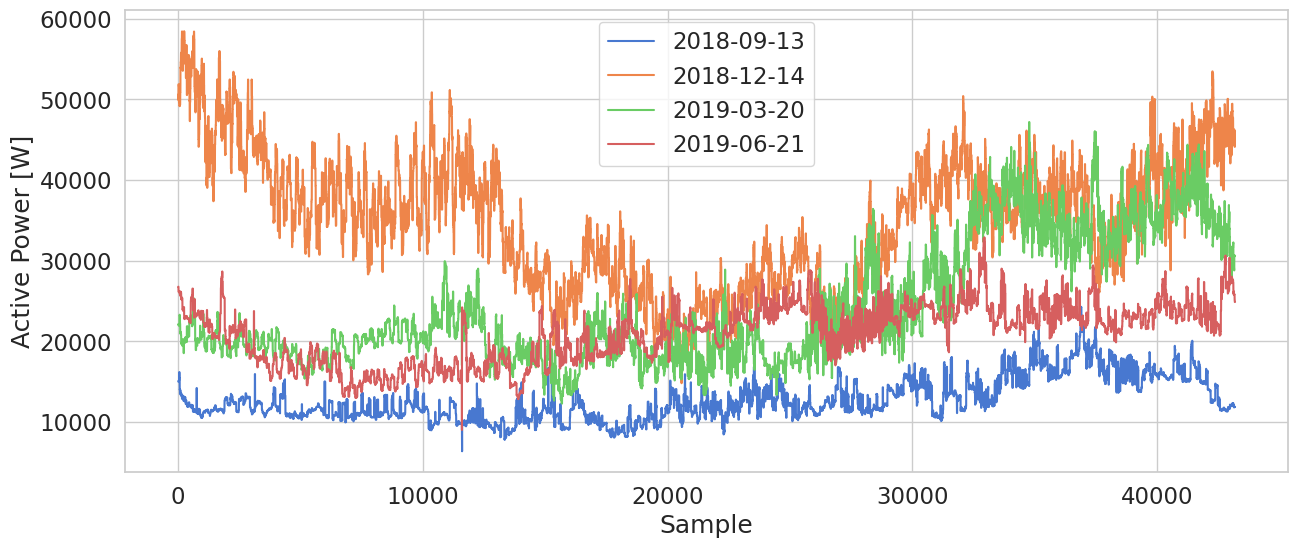

In [22]:
# Basic plot - four days dorms
from matplotlib import pyplot
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(15, 6))

plt.plot(range(43198),df['2018-09-13'], label='2018-09-13')
plt.plot(range(43198),df['2018-12-14'], label='2018-12-14')
plt.plot(range(43198),df['2019-03-20'], label='2019-03-20')
plt.plot(range(43198),df['2019-06-21'], label='2019-06-21')

pyplot.legend(loc='upper center')
plt.ylabel("Active Power [W]"); plt.xlabel("Sample")
plt.savefig('/content/drive/MyDrive/Figures/four_days_dorms.pdf', format='pdf', dpi=1000)

plt.show()

Share of outliers in the series: 0.05275707208667068


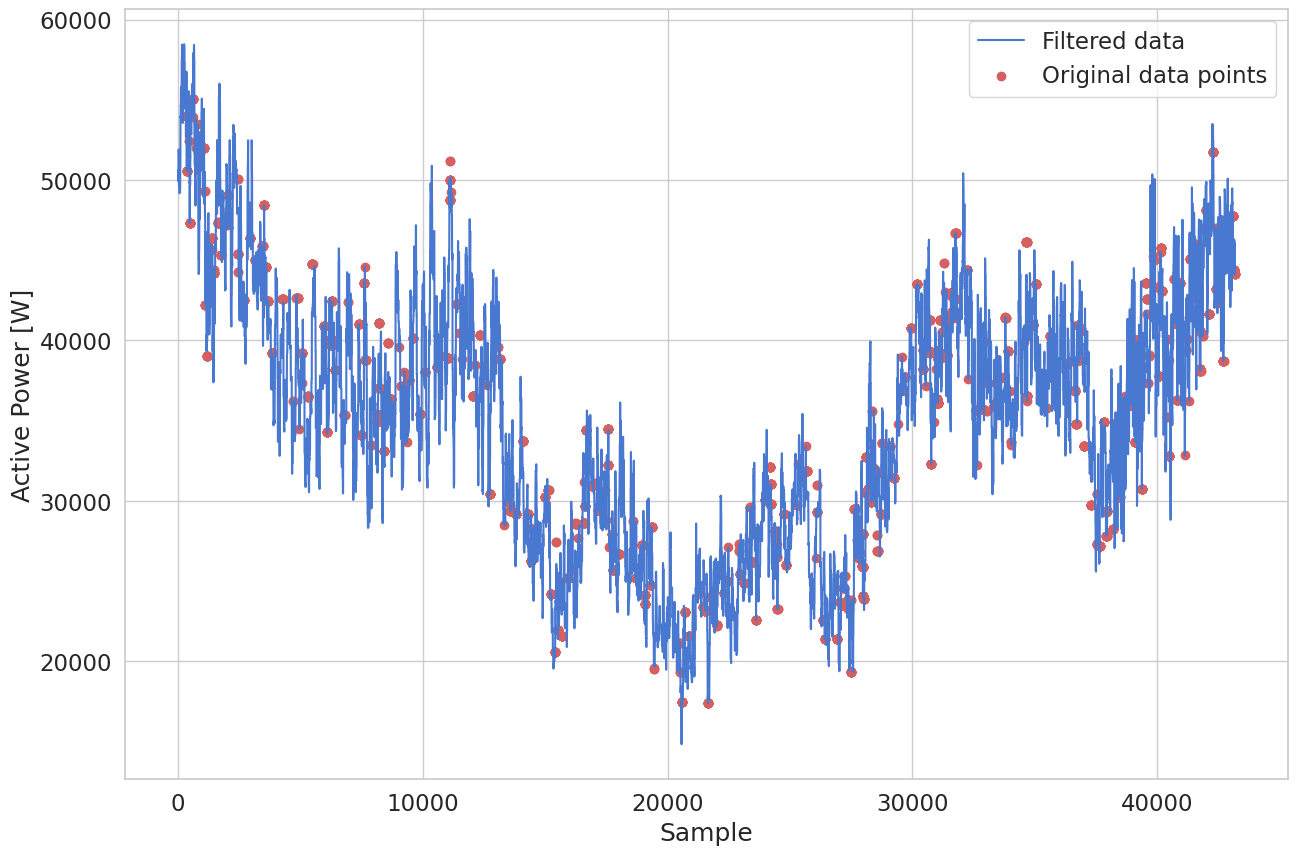

In [28]:
# Day 1
# -----------------
# APPLY FILTERING
# -----------------

# apply filter to one month of data
#excerpt = df_smd['Value'].iloc[:96 * 30]
excerpt=df['2018-12-14']
filtered, mask = hampel_filter(excerpt, 15)

#Workaround to remove datetime from index...
excerpt.index=range(0,43198)
filtered.index=range(0,43198)

fig, ax = plt.subplots(figsize=(15, 10))
# plot the filtered time series
ax.plot(filtered, label='Filtered data')
# plot dots for the filtered out data
#ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.set_xlabel('Sample')
ax.set_ylabel('Active Power [W]')
ax.legend()

plt.savefig('/content/drive/MyDrive/Figures/outliers_hampel.pdf', format='pdf', dpi=1000)
fig.show()

In [ ]:
# -----------------
# APPLY FILTERING
# -----------------

# apply filter to one month of data
#excerpt = df_smd['Value'].iloc[:96 * 30]
excerpt=df['2018-09-13']
filtered, mask = hampel_filter(excerpt, 15)

#Workaround to remove datetime from index...
excerpt.index=range(0,43198)
filtered.index=range(0,43198)

fig, ax = plt.subplots(figsize=(14, 5))
# plot the filtered time series
ax.plot(filtered, label='Filtered data')
# plot dots for the filtered out data
#ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.legend()

plt.savefig('/content/drive/MyDrive/Figures/outliers_hampel.pdf', format='pdf', dpi=1000)
fig.show()

In [ ]:
# -----------------
# APPLY FILTERING
# -----------------

# apply filter to one month of data
#excerpt = df_smd['Value'].iloc[:96 * 30]
excerpt=df3['power']
filtered, mask = hampel_filter(excerpt, 15)

#Workaround to remove datetime from index...
excerpt.index=range(0,43198)
filtered.index=range(0,43198)

fig, ax = plt.subplots(figsize=(14, 5))
# plot the filtered time series
ax.plot(filtered, label='Filtered data')
# plot dots for the filtered out data
#ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.legend()

fig.show()

In [ ]:
# -----------------
# APPLY FILTERING
# -----------------

# apply filter to one month of data
#excerpt = df_smd['Value'].iloc[:96 * 30]
excerpt=df4['power']
filtered, mask = hampel_filter(excerpt, 15)

#Workaround to remove datetime from index...
excerpt.index=range(0,43198)
filtered.index=range(0,43198)

fig, ax = plt.subplots(figsize=(14, 5))
# plot the filtered time series
ax.plot(filtered, label='Filtered data')
# plot dots for the filtered out data
#ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.scatter(excerpt.index[mask], excerpt[mask], c='r', label='Original data points')

ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.legend()

fig.show()

In [ ]:
from autots.models.model_list import model_lists
print(model_lists.keys())

In [ ]:
df_beta=df['2018-09-13']
df_beta.index=a

In [ ]:
from autots import AutoTS

model = AutoTS(
    forecast_length=3,
    frequency='infer',
    model_list='probabilistic',
    ensemble=None,
    max_generations=3,
    num_validations=2,
)

model = model.fit(df_beta[::10])

# Print the description of the best model
print(model)

In [ ]:
prediction_original = model.predict(forecast_length=72)

In [ ]:
prediction_original.forecast

In [ ]:
with open('drive/MyDrive/Data/model_prediction_original.pickle', 'wb') as handle:
    pickle.dump([model, prediction_original], handle)

In [ ]:
filtered.index=a
print(filtered)

In [ ]:
from autots import AutoTS

model_filter = AutoTS(
    forecast_length=3,
    frequency='infer',
    model_list='probabilistic',
    ensemble=None,
    max_generations=3,
    num_validations=2,
)

model_filter = model_filter.fit(filtered[::10])

# Print the description of the best model
print(model_filter)

In [ ]:
prediction_filter = model_filter.predict(forecast_length=72)

In [ ]:
prediction_filter.forecast

In [ ]:
with open('drive/MyDrive/Data/model_prediction_filter.pickle', 'wb') as handle:
    pickle.dump([model_filter, prediction_filter], handle)

In [ ]:
# Basic plot - orignal and filter predictions with NVAr
from matplotlib import pyplot
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(15, 6))

plt.plot(range(72),prediction_original.forecast, label='Original')
plt.plot(range(72),prediction_filter.forecast, label='Filtered')

pyplot.legend(loc='upper right')
plt.ylabel("Active Power [W]"); plt.xlabel("Sample")
plt.savefig('/content/drive/MyDrive/Figures/original_filter_predictions.pdf', format='pdf', dpi=1000)

plt.show()